# GAN Model 

In this notebook, we will attempt to create a DCGAN in order to generate movie posters of specific genres. 



In [39]:
from models.GANModel import GANModel 
# from GenreDataset import GenreDataset 
import numpy as np
import glob
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, lets inspect some of the posters we are looking at. Here are some posters for the "Comedy" genre. 

In [3]:
def show_images(X):
    fig = plt.figure() 
    rows, columns = 1, 5
    fig = plt.figure()
    for i in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, i)
        image = X[i-1]
        plt.imshow(image)
        plt.axis('off')

In [41]:
def get_session():
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True 
    session = tf.Session(config=config) 
    return session

In [113]:
class GenreDataset():
    def __init__(self, genre, batch_size):
        fig = plt.figure()
        dirname = "posters/"+genre
        image_list = []
        for filename in glob.glob('posters/' + genre + '/*.jpg'):
            im=Image.open(filename)
            img = im.resize((128, 128))
            image_list.append(np.array(img))
            
        self.X = np.array(image_list)
        self.X = self.X.astype(np.float32)/255
        self.batch_size = batch_size
        print(self.X.shape)
        
    def __iter__(self): 
        N, B = self.X.shape[0], self.batch_size 
        idxs = np.arange(N)

        return iter(self.X[i:i+B] for i in range(0, N))


In [114]:
dataset = GenreDataset("Comedy", 100)

(3463, 128, 128, 3)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

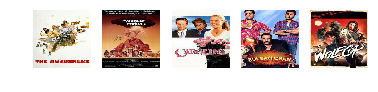

In [115]:
show_images(dataset.X[:5])

# Training a Model

We will now try to make a GAN using the comedy genre. 

Epoch #0 out of 5: 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

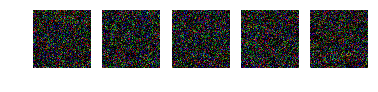

KeyboardInterrupt: 

In [127]:
model = GANModel("Comedy", 100)
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
#     sess.run(tf.local_variables_initializer())
    model.fit(sess, dataset)